In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../..")

from utils_common import EvalData

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Extracting Test Data

The pre-trained model (modelnet40_partial/913r (airplane)) evaluated on 
1. modelnet40_complete(airplane)
2. shapenet.real.hard.airplane
3. shapenet.real.medium.airplane
4. shapenet.real.easy.airplane

In [2]:
labels = ["modelnet40_partial", 
          "shapenet.real.easy",
          "shapenet.real.medium",
          "shapenet.real.hard"
         ]

files = []
# dataset: modelnet40_partial (airplane)
files.append("../equi-pose/runs/Dec08_17-16-48_spark-agent/eval_data.pkl")

# dataset: shapenet.real.easy (airplane)
files.append("../equi-pose/runs/Dec08_18-31-26_spark-agent/eval_data.pkl")

# dataset: shapenet.real.medium (airplane)
files.append("../equi-pose/runs/Dec08_18-33-30_spark-agent/eval_data.pkl")

# dataset: shapenet.real.hard (airplane)
files.append("../equi-pose/runs/Dec08_18-35-32_spark-agent/eval_data.pkl")


In [3]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
#     print(eval_data.data["adds"])
    
    eval_data.complete_eval_data()
    data[label] = eval_data.data

label:  modelnet40_partial
loading file:  ../equi-pose/runs/Dec08_17-16-48_spark-agent/eval_data.pkl
label:  shapenet.real.easy
loading file:  ../equi-pose/runs/Dec08_18-31-26_spark-agent/eval_data.pkl
label:  shapenet.real.medium
loading file:  ../equi-pose/runs/Dec08_18-33-30_spark-agent/eval_data.pkl
label:  shapenet.real.hard
loading file:  ../equi-pose/runs/Dec08_18-35-32_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [5]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,modelnet40_partial,shapenet.real.easy,shapenet.real.medium,shapenet.real.hard
adds_th_score,0.028000,0.259766,0.031250,0.035156
adds_auc,0.101569,0.344115,0.065188,0.049775


## Distribution of Error Metrics

In [17]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [18]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

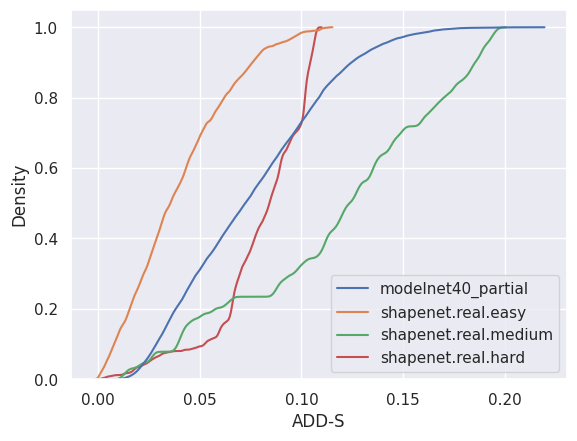

In [19]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [10]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [11]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

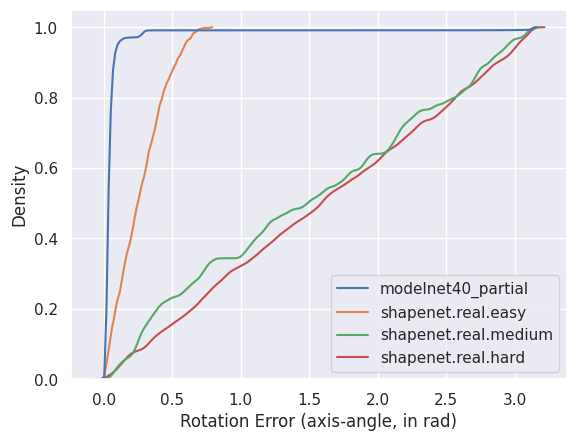

In [12]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [13]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [14]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

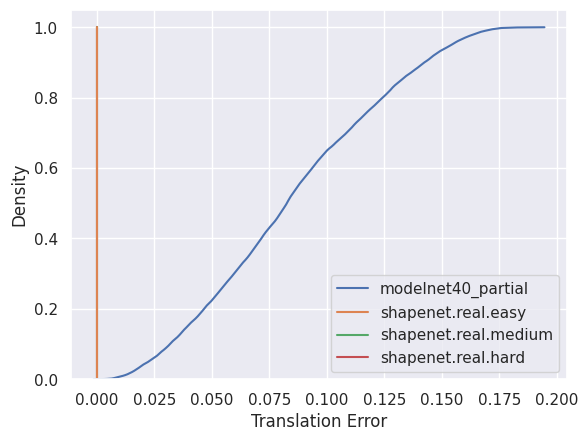

In [15]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')

<AxesSubplot: ylabel='Density'>

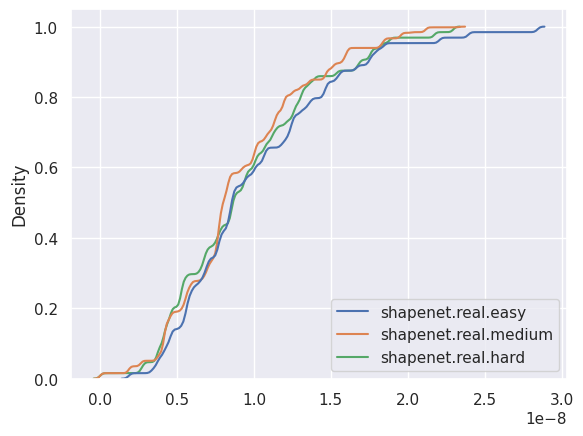

In [16]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in ["shapenet.real.easy", "shapenet.real.medium", "shapenet.real.hard"]])
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)

## Conclusion

1. To be written.